<a href="https://colab.research.google.com/github/shayaan-1/Ecommerce-Spending-Predictions/blob/main/EcommerceAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Read and Understand Data

In [1]:
import pandas as pd

# Load CSV file
customers = pd.read_csv('/content/Ecommerce Customers')

# Show first five records
print(customers.head())

# Get basic info
print(customers.info())

# Get statistical summary
print(customers.describe())

                           Email  \
0      mstephenson@fernandez.com   
1              hduke@hotmail.com   
2               pallen@yahoo.com   
3        riverarebecca@gmail.com   
4  mstephens@davidson-herman.com   

                                             Address            Avatar  \
0       835 Frank Tunnel\nWrightmouth, MI 82180-9605            Violet   
1     4547 Archer Common\nDiazchester, CA 06566-8576         DarkGreen   
2  24645 Valerie Unions Suite 582\nCobbborough, D...            Bisque   
3   1414 David Throughway\nPort Jason, OH 22070-1220       SaddleBrown   
4  14023 Rodriguez Passage\nPort Jacobville, PR 3...  MediumAquaMarine   

   Avg. Session Length  Time on App  Time on Website  Length of Membership  \
0            34.497268    12.655651        39.577668              4.082621   
1            31.926272    11.109461        37.268959              2.664034   
2            33.000915    11.330278        37.110597              4.104543   
3            34.305557    

2. Exploratory Data analysis


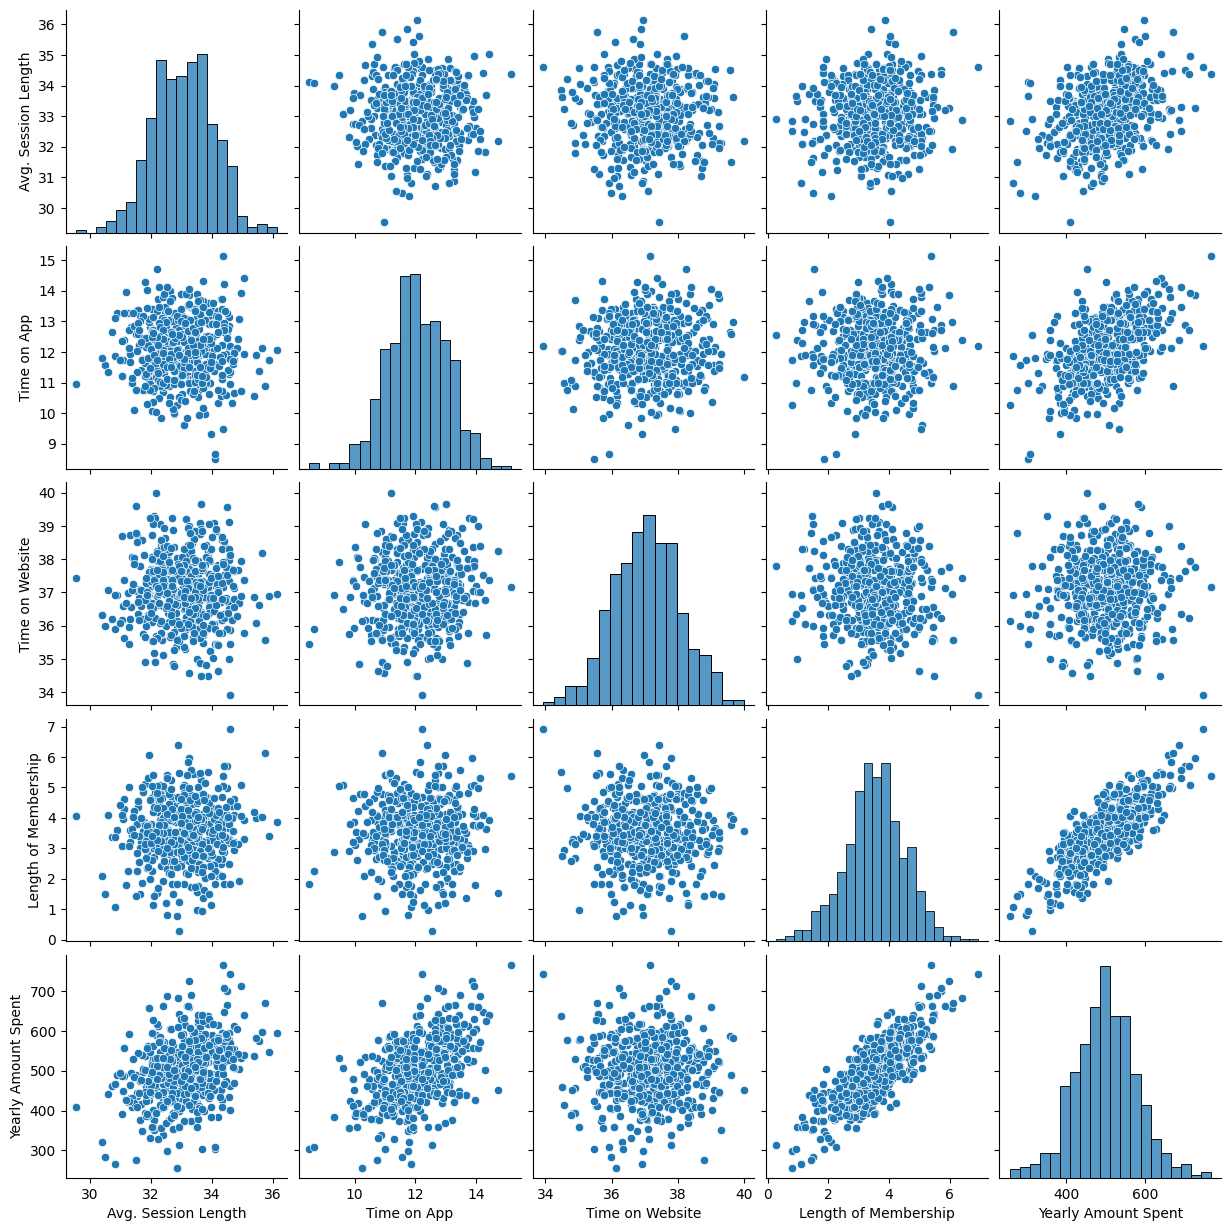

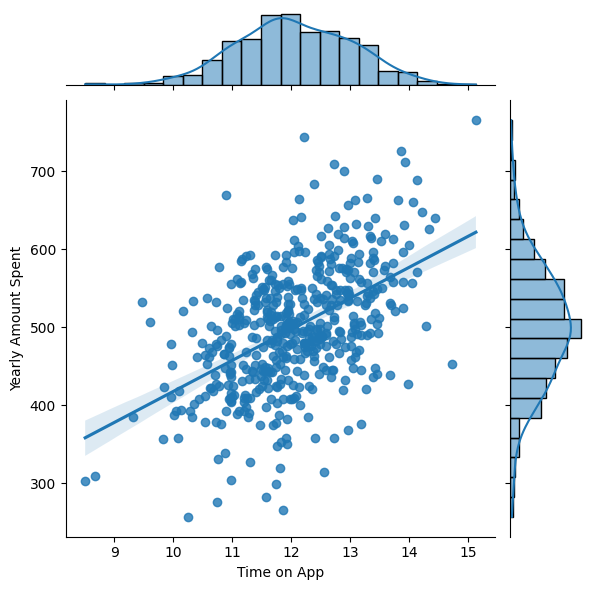

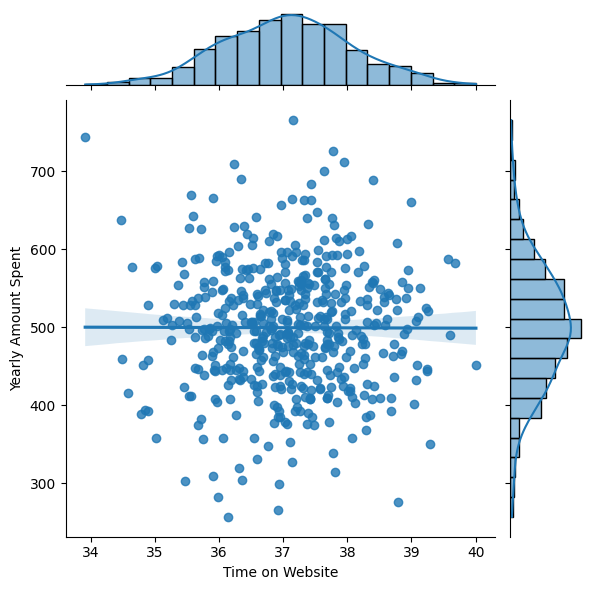

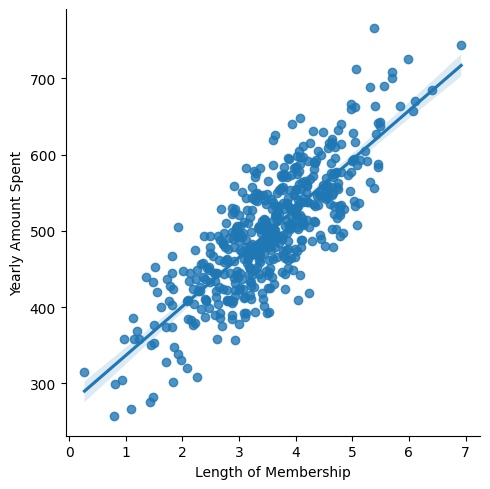

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pair plot to see relationships
sns.pairplot(customers)
plt.show()

# Jointplot for Time on App vs Yearly Spending
sns.jointplot(x='Time on App', y='Yearly Amount Spent', data=customers, kind='reg')

# Jointplot for Time on Website vs Yearly Spending
sns.jointplot(x='Time on Website', y='Yearly Amount Spent', data=customers, kind='reg')

# Length of Membership vs Yearly Spending
sns.lmplot(x='Length of Membership', y='Yearly Amount Spent', data=customers)
plt.show()

3. Splitting the data

In [3]:
from sklearn.model_selection import train_test_split

# Define X (features) and y (target)
X = customers[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]
Y = customers['Yearly Amount Spent']

# Split into training (80%) and testing (20%) data
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)


4. Train the Linear Regression Model

In [4]:
from sklearn.linear_model import LinearRegression

# Create model instance
lm = LinearRegression()

# Train the model
lm.fit(X_train, Y_train)

# Print model coefficients
print(pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient']))


                      Coefficient
Avg. Session Length     25.723477
Time on App             38.895700
Time on Website          0.496052
Length of Membership    61.438644


5. Evaluating the model

In [9]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Predict on test data
y_pred = lm.predict(X_test)

# Evaluating predictions
print(f"R² Score: {lm.score(X_test, Y_test)}")  # Closer to 1 is better
print(f"MAE: {mean_absolute_error(Y_test, y_pred)}")
print(f"MSE: {mean_squared_error(Y_test, y_pred)}")
print(f"RMSE: {np.sqrt(mean_squared_error(Y_test, y_pred))}")

R² Score: 0.9878559970002221
MAE: 7.182689233710779
MSE: 81.22618909322318
RMSE: 9.012557300412752


6. Visualizing predictions

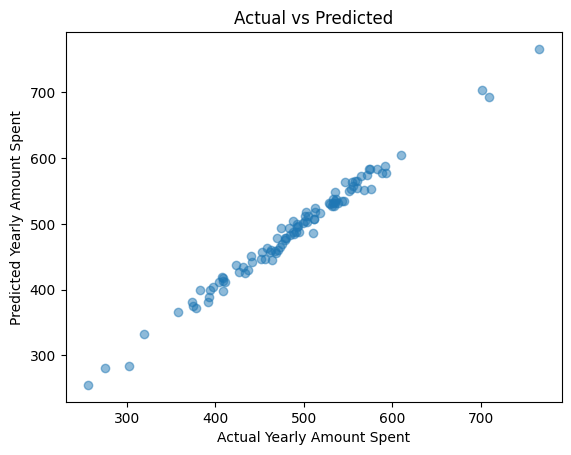

In [10]:
plt.scatter(Y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Yearly Amount Spent")
plt.ylabel("Predicted Yearly Amount Spent")
plt.title("Actual vs Predicted")
plt.show()